<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/Discussion-and-TupleBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

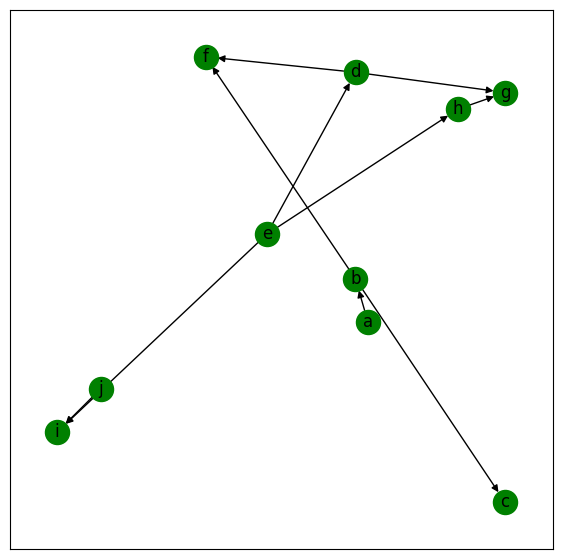

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
a =1
b=2
c=3
d=4
e=5
f=6
g=7
h=8
i=9
j=10
G.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
G.add_edges_from([('a', 'b'), ('b' , 'c'), ('b', 'f'), ('d', 'f'), ('d', 'g'), ('e', 'h'), ('e', 'd'), ('e', 'i'),  ('j', 'i'), ('h', 'g')])
  
plt.figure(figsize =(7, 7))
nx.draw_networkx(G, with_labels = True, node_color ='green')

**2 - Discussion Based**

In [2]:
def discussion_based(G , threshhold) :
  n = G.number_of_nodes()
  nodes = list(G.nodes())
  m = [0 for _ in range(n)]
  p = [list(G.predecessors(i)) for i in G.nodes()]
  step = [len(l) for l in p]
  mat = []
  mat.append(step)

  index = 1
  while( (not (step == m)) and index <= threshhold) :
    index = index +1  
    dis2 = [[] for _ in range(n)]
    
    for i in range(n) :
      for j in p[i] :
        for k in list(G.predecessors(j)) :
          dis2[i].append( k )
          #dis2[i] = list(set(dis2[i]))

    if index % 2 == 0 :
      step =  [-len(l) for l in dis2]
    else :
      step =  [len(l) for l in dis2]

    mat.append(step)
    p = dis2
 
  scores = list(zip(*mat))
  nodes=["a","b","c","d","e","f","g","h","i","j"]
  nodes_scores = list(zip(nodes ,  scores ))
  sorted_nodes = [x[0] for x in sorted(nodes_scores, key=lambda x: x[1:])]

  return(sorted_nodes)


In [3]:
print(discussion_based(G , 5))

['a', 'e', 'j', 'c', 'b', 'd', 'h', 'f', 'g', 'i']


In [4]:
def has_cycle(G):
  nodes = list(G.nodes())
  n = G.number_of_nodes()
  p = [list(G.successors(i)) for i in G.nodes()]

  cycle = False
  vis = [False for _ in range(n)]
  for i in range(n) :
    while(p[i]):
      pp = []
      if (nodes[i] in p[i]) :
        cycle = True 
      for j in p[i] :
        if (vis[p[i].index(j)]) :
          continue 
        else :
          vis[p[i].index(j)] = True
          for l in list(G.successors(j)) :
            pp.append(l)
      p[i] = pp

  return cycle

In [5]:
has_cycle(G)

False

**5 - Tuple Based**

In [86]:
import sys

In [74]:
def tuples_cmp(va , vb) :
  p =0
  i=1
  if (len(va[i]) == len(vb[i]) and len(va[p]) == len(vb[p])):
    if (va[p] <= vb[p] and va[i] >= vb[i]) :
      return True
    else :
      if (va[p] >= vb[p] and va[i] <= vb[i]):
        return False
      else :
        print("2 argument incomparable")
  else:
    if (len(va[i]) >= len(vb[i]) and len(va[p]) >= len(vb[p]) ):
      return False
    else:
      if (len(va[i]) <= len(vb[i]) and len(va[p]) >= len(vb[p])) :
        return True
      else :
        print("2 argument incomparable")
    

In [75]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        incomparable = False
        while i < len(left_half) and j < len(right_half):
            if tuples_cmp( left_half[i][1] , right_half[j][1]):
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    

In [83]:
def tuple_based(G) :
  if has_cycle(G):
    print("graph has cycles can't provide a ranking")
  else:
    n = G.number_of_nodes()
    nodes = list(G.nodes())
    m = [0 for _ in range(n)]
    p = [list(G.predecessors(i)) for i in G.nodes()]
    l = [[[],[]] for _ in range(n)]

    for i in range(n) :
      if not(p[i]) :
        l[i][0] = sys.maxsize

    m = [[] for _ in range(n)]

    index = 0
    while( (not (p == m)) ) :
      index = index +1  
      d = [[] for _ in range(n)]
      for i in range(n) :
        for j in p[i] :
          pred = list(G.predecessors(j))
          if (not (pred)) :
            #root element 
            if (index % 2 == 1 ) :
              l[i][1].append(index)
            else :
              l[i][0].append(index)
          for k in list(G.predecessors(j)) :
            d[i].append( k )
      p = d

    nodes_scores = list(zip(nodes ,  l ))

    first_ones = [x for x in nodes_scores if x[1][0] == sys.maxsize]
    others = [x for x in nodes_scores if x not in first_ones]
    
    merge_sort(others)
    first = [x[0] for x in first_ones]
    other = [x[0] for x in others]
    
    ranking = first + other
    return ranking

In [85]:
print(tuple_based(G))

2 argument incomparable
2 argument incomparable
2 argument incomparable
['a', 'e', 'j']
['f', 'g', 'c', 'b', 'd', 'h', 'i']
['a', 'e', 'j', 'f', 'g', 'c', 'b', 'd', 'h', 'i']
